### Para a analise utilizei bibliotecas do python como o pandas pra leitura e manipulação dos dados, a biblioteca folium pra geração dos mapas geoespaciais e tambem a biblioteca seaborn pra geração dos graficos. Os dados foram coletados do satelite S-NPP da nasa.

In [30]:
#Importando as bibliotecas
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MousePosition
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
#Lendo o dataset
data = pd.read_csv('/home/eduardo/projetos/fire_municipios/fire/fire_nrt_SV-C2_393750.csv')

In [32]:
#Carregando o dataset
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-9.37798,-40.31827,340.54,0.46,0.63,2022-09-01,317,N,VIIRS,n,2.0NRT,287.68,5.20,N
1,-9.37719,-40.32247,304.88,0.46,0.63,2022-09-01,317,N,VIIRS,n,2.0NRT,287.06,4.68,N
2,-9.37569,-40.32060,356.01,0.46,0.63,2022-09-01,317,N,VIIRS,n,2.0NRT,289.95,12.88,N
3,-9.37650,-40.31640,331.61,0.46,0.63,2022-09-01,317,N,VIIRS,n,2.0NRT,288.21,7.58,N
4,-9.43314,-40.40244,303.32,0.46,0.64,2022-09-01,317,N,VIIRS,n,2.0NRT,287.23,1.07,N


In [33]:
#Verificando se existem valores faltantes
data.isna().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

In [34]:
#Definindo latitude e longitude dos municipios
latitude_min = -18.5
latitude_max = -17.5
longitude_min = -51.5
longitude_max = -50.5

df_municipios = data.loc[
    (data["latitude"] >= latitude_min) & (data["latitude"] <= latitude_max)
    & (data["longitude"] >= longitude_min) & (data["longitude"] <= longitude_max)
]

print(df_municipios[["latitude", "longitude"]])


         latitude  longitude
6643    -17.80771  -50.70013
6645    -17.80597  -50.70194
10617   -18.33795  -51.27631
27212   -17.68728  -50.86186
27215   -17.78772  -50.61097
...           ...        ...
1829587 -18.32464  -51.09344
1839425 -17.72930  -50.77237
1839426 -17.72983  -50.76827
1839517 -18.06582  -51.38429
1839518 -18.06994  -51.38485

[838 rows x 2 columns]


In [35]:
#Filtrando as coordenadas
df_municipios = data.query(
    "latitude >= @latitude_min & latitude <= @latitude_max & longitude >= @longitude_min & longitude <= @longitude_max"
)

In [36]:
df_municipios.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
6643,-17.80771,-50.70013,310.02,0.45,0.47,2022-09-01,501,N,VIIRS,n,2.0NRT,286.96,1.48,N
6645,-17.80597,-50.70194,317.79,0.45,0.47,2022-09-01,501,N,VIIRS,n,2.0NRT,287.97,1.65,N
10617,-18.33795,-51.27631,340.51,0.55,0.51,2022-09-01,1732,N,VIIRS,l,2.0NRT,311.47,10.49,D
27212,-17.68728,-50.86186,300.44,0.40,0.37,2022-09-02,442,N,VIIRS,n,2.0NRT,289.99,0.80,N
27215,-17.78772,-50.61097,300.60,0.40,0.37,2022-09-02,442,N,VIIRS,n,2.0NRT,289.05,0.98,N


#### Gerando mapa base.

In [42]:
baseMap = folium.Map(
    width='100%',
    height='100%',
    location=[-18.44677, -50.45145],
    zoom_start= 10
)

In [8]:
MousePosition().add_to(baseMap)

In [38]:
baseMap

#### Gerando o mapa de calor das ocorrencias por dia.

In [39]:
coords = df_municipios[['latitude', 'longitude', 'brightness']].values.tolist()

In [40]:
HeatMap(coords, radius = 15).add_to(baseMap)

In [41]:
baseMap

#### Transformando a variavel acq_time para o formato de horas

In [16]:
def transform_str(valor):
    transformed = str(valor).zfill(4)
    return transformed[0:2] + ':' + transformed[2:]

In [17]:
df_municipios['acq_time'] = df_municipios.acq_time.apply(transform_str)

In [18]:
def get_hora(valor):
    hora = valor[:2]
    hora = valor.split(':')[0]
    return hora

#### Criando uma nova coluna somente com as informações das horas.

In [19]:
df_municipios['hora'] = df_municipios.acq_time.apply(get_hora)

In [20]:
df_municipios.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,hora
6643,-17.80771,-50.70013,310.02,0.45,0.47,2022-09-01,05:01,N,VIIRS,n,2.0NRT,286.96,1.48,N,05
6645,-17.80597,-50.70194,317.79,0.45,0.47,2022-09-01,05:01,N,VIIRS,n,2.0NRT,287.97,1.65,N,05
10617,-18.33795,-51.27631,340.51,0.55,0.51,2022-09-01,17:32,N,VIIRS,l,2.0NRT,311.47,10.49,D,17
27212,-17.68728,-50.86186,300.44,0.40,0.37,2022-09-02,04:42,N,VIIRS,n,2.0NRT,289.99,0.80,N,04
27215,-17.78772,-50.61097,300.60,0.40,0.37,2022-09-02,04:42,N,VIIRS,n,2.0NRT,289.05,0.98,N,04


#### Verificando hora minima e hora maxima das coletas do satelite durante esse periodo.

In [22]:
hora_minima = df_municipios["hora"].min()
hora_maxima = df_municipios["hora"].max()

In [23]:
hora_minima, hora_maxima

('03', '17')

#### Ocorrencias de incendios por hora

In [24]:
df_municipios = df_municipios.sort_values("hora")

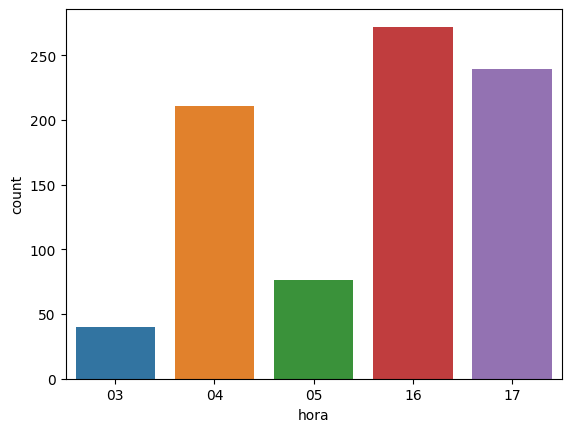

In [25]:
sns.countplot(x="hora", data=df_municipios);

#### Analisando o grafico sabemos que as maiores ocorrencias ocorrem entre 16h e 17h

#### Analisando a intensidade dos incendios

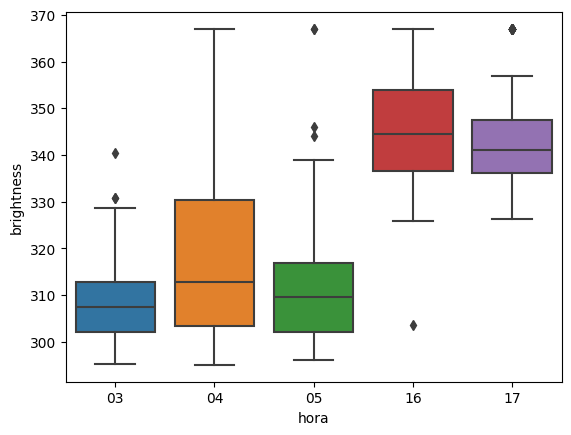

In [27]:
sns.boxplot(x="hora", y="brightness", data=df_municipios);

#### A intensidade varia entre 285 e 365 kelvin

#### Gerando mapa de calor das ocorrencias por hora.

In [28]:
# Calcular as horas mínima e máxima no DataFrame.
hora_minima = df_municipios['hora'].min()
hora_maxima = df_municipios['hora'].max()

# Filtrar os dados com base nas horas mínima e máxima.
filtered_data = df_municipios[(df_municipios['hora'] == hora_minima) | (df_municipios['hora'] == hora_maxima)][['latitude', 'longitude', 'brightness', 'hora']]

# Criar um mapa base usando o Folium.
m = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=4)

# Adicionar o mapa de calor ao mapa base.
heat_data = [[row['latitude'], row['longitude'], row['brightness']] for index, row in filtered_data.iterrows()]
HeatMap(heat_data).add_to(m)

# Adicionar pop-ups personalizados com informações de hora e brightness.
for index, row in filtered_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f'Hora: {row["hora"]}<br>Brightness: {row["brightness"]}').add_to(m)

# Salvar o mapa em um arquivo HTML.
m.save('mapa_de_calor_com_popups.html')

In [29]:
m